# Defining expression level categories (ELC-analysis)


In [2]:
library(data.table)
library(ggplot2)
library(RPostgreSQL)
library(foreach)
library(tidyverse, warn.conflicts = FALSE)

In [3]:
set.seed(42) # For reproducibility of results

In [4]:
non.expr.cutoff=0.5

In [6]:
# import paired read count table
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/triticum/")
trit <- readRDS("wheat_count_table_paired.rds")
d <- trit$counts
dim(d)
head(d)
# dimensions shows that a total of 180 samples were mapped to 123 075 genes of T.aestivum

[1] 123075    180

,SRR10737427,SRR10737428,SRR10737429,SRR10737430,SRR10737431,SRR10737432,CRR088963,CRR088962,CRR088961,CRR088960,⋯,SRR8413505,SRR8413506,SRR8413507,SRR8413508,SRR5186313,SRR5186364,SRR5186375,SRR5186382,SRR5186387,SRR5186416
TraesCHI1A01G000100,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,⋯,0.0000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TraesCHI1A01G000200,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,⋯,0.0000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TraesCHI1A01G000300,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,⋯,6.0000,7.878112,14.0000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TraesCHI1A01G000400,0.0000,0.000000,0.0000,4.893036,4.726423,1.938802,0.0000,0.000000,0.0000,0.0000,⋯,140.5432,108.839845,177.3651,112.3966,1.993108,0.000000,0.000000,0.000000,2.004102,0.000000
TraesCHI1A01G000500,1.0000,8.000000,7.0000,9.000000,2.000000,3.000000,1.0000,8.000000,7.0000,9.0000,⋯,5.0000,11.000000,12.0000,5.0000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
TraesCHI1A01G000600,193.3952,2.465932,159.4838,51.088736,8.853329,80.785644,193.3877,2.465675,159.5168,126.3058,⋯,387.2507,513.135328,458.2691,355.3096,0.000000,2.649372,1.307648,4.297154,4.083578,1.356089


In [7]:
# import single read count table
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/triticum/")
trit_s <- readRDS("wheat_count_table_single.rds")
s <- trit_s$counts
dim(s)
head(s)
# dimensions shows that a total of 35 samples were mapped to 123 075 genes of T.aestivum

[1] 123075     35

,CRR078059,CRR078085,CRR078084,CRR078083,CRR078082,CRR078081,CRR078080,CRR078079,CRR078078,CRR078077,⋯,CRR078061,CRR078060,SRR5464524,SRR5464523,SRR5464520,SRR5464519,SRR5464518,SRR5464515,SRR5464508,SRR5464507
TraesCHI1A01G000100,0.00000,0.000000,1.075752,0.000000,0.000000,1.188353e+00,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0,637.8077,466.84146,616.33167,665.257416,722.3597,831.6903,750.68504,474.00000
TraesCHI1A01G000200,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,1.000000,⋯,0.000000,0,0.0000,0.00000,0.00000,0.000000,0.0000,0.0000,0.00000,0.00000
TraesCHI1A01G000300,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0,24.0000,13.00000,8.00000,14.926194,4.0000,6.0000,4.00000,3.00000
TraesCHI1A01G000400,13.85653,4.800697,10.421303,8.036155,5.824054,1.405039e+01,8.947824,3.314993,7.413128,7.000971,⋯,9.170686,4,53.8823,31.90793,98.87497,120.652110,109.3530,119.7540,112.31362,88.60057
TraesCHI1A01G000500,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.028355,2.042307,0.000000,0.000000,⋯,0.000000,0,0.0000,0.00000,0.00000,2.073806,0.0000,0.0000,0.00000,0.00000
TraesCHI1A01G000600,0.00000,0.000000,0.000000,0.000000,0.000000,4.247404e-08,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0,0.0000,0.00000,0.00000,0.000000,0.0000,0.0000,14.29808,0.00000


In [8]:
# merge count tables
d <- as.data.frame(d)
d$locus <- row.names(d)
s <- as.data.frame(s)
s$locus <- row.names(s)
ds <- merge(d, s, by = "locus", all = TRUE)
dim(ds)
head(ds)

[1] 123075    216

,locus,SRR10737427,SRR10737428,SRR10737429,SRR10737430,SRR10737431,SRR10737432,CRR088963,CRR088962,CRR088961,⋯,CRR078061,CRR078060,SRR5464524,SRR5464523,SRR5464520,SRR5464519,SRR5464518,SRR5464515,SRR5464508,SRR5464507
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TraesCHI1A01G000100,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,⋯,0.000000,0,637.8077,466.84146,616.33167,665.257416,722.3597,831.6903,750.68504,474.00000
2,TraesCHI1A01G000200,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,⋯,0.000000,0,0.0000,0.00000,0.00000,0.000000,0.0000,0.0000,0.00000,0.00000
3,TraesCHI1A01G000300,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,⋯,0.000000,0,24.0000,13.00000,8.00000,14.926194,4.0000,6.0000,4.00000,3.00000
4,TraesCHI1A01G000400,0.0000,0.000000,0.0000,4.893036,4.726423,1.938802,0.0000,0.000000,0.0000,⋯,9.170686,4,53.8823,31.90793,98.87497,120.652110,109.3530,119.7540,112.31362,88.60057
5,TraesCHI1A01G000500,1.0000,8.000000,7.0000,9.000000,2.000000,3.000000,1.0000,8.000000,7.0000,⋯,0.000000,0,0.0000,0.00000,0.00000,2.073806,0.0000,0.0000,0.00000,0.00000
6,TraesCHI1A01G000600,193.3952,2.465932,159.4838,51.088736,8.853329,80.785644,193.3877,2.465675,159.5168,⋯,0.000000,0,0.0000,0.00000,0.00000,0.000000,0.0000,0.0000,14.29808,0.00000


In [9]:
m=as.data.table(ds)
m=melt(m,id.vars=c("locus"),variable.name="sample_id",value.name="tpm")
setkey(m,locus,sample_id)
head(m)

locus,sample_id,tpm
<chr>,<fct>,<dbl>
TraesCHI1A01G000100,SRR10737427,0
TraesCHI1A01G000100,SRR10737428,0
TraesCHI1A01G000100,SRR10737429,0
TraesCHI1A01G000100,SRR10737430,0
TraesCHI1A01G000100,SRR10737431,0
TraesCHI1A01G000100,SRR10737432,0


In [17]:
tau<-function(x){
  if(any(is.na(x))) stop('NA\'s need to be 0.')
  if(any(x<0)) stop('Negative input values not permitted. Maybe data is log transformed?')
  t<-sum(1-x/max(x))/(length(x)-1)
}

In [18]:
dm <- data.matrix(ds, rownames.force = TRUE)
locus <- ds$locus
row.names(dm) <- locus
dm <- dm[1:123075, 2:216]
head(dm)
tau=apply(dm,1,tau)
head(tau)

Warning message in data.matrix(ds, rownames.force = TRUE):
“NAs introduced by coercion”

,SRR10737427,SRR10737428,SRR10737429,SRR10737430,SRR10737431,SRR10737432,CRR088963,CRR088962,CRR088961,CRR088960,⋯,CRR078061,CRR078060,SRR5464524,SRR5464523,SRR5464520,SRR5464519,SRR5464518,SRR5464515,SRR5464508,SRR5464507
TraesCHI1A01G000100,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,⋯,0.000000,0,637.8077,466.84146,616.33167,665.257416,722.3597,831.6903,750.68504,474.00000
TraesCHI1A01G000200,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,⋯,0.000000,0,0.0000,0.00000,0.00000,0.000000,0.0000,0.0000,0.00000,0.00000
TraesCHI1A01G000300,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.0000,⋯,0.000000,0,24.0000,13.00000,8.00000,14.926194,4.0000,6.0000,4.00000,3.00000
TraesCHI1A01G000400,0.0000,0.000000,0.0000,4.893036,4.726423,1.938802,0.0000,0.000000,0.0000,0.0000,⋯,9.170686,4,53.8823,31.90793,98.87497,120.652110,109.3530,119.7540,112.31362,88.60057
TraesCHI1A01G000500,1.0000,8.000000,7.0000,9.000000,2.000000,3.000000,1.0000,8.000000,7.0000,9.0000,⋯,0.000000,0,0.0000,0.00000,0.00000,2.073806,0.0000,0.0000,0.00000,0.00000
TraesCHI1A01G000600,193.3952,2.465932,159.4838,51.088736,8.853329,80.785644,193.3877,2.465675,159.5168,126.3058,⋯,0.000000,0,0.0000,0.00000,0.00000,0.000000,0.0000,0.0000,14.29808,0.00000


TraesCHI1A01G000100 TraesCHI1A01G000200 TraesCHI1A01G000300 TraesCHI1A01G000400 
          0.8808196           0.9623186           0.9407439           0.8952350 
TraesCHI1A01G000500 TraesCHI1A01G000600 
          0.9559066           0.9659187

In [19]:
Mall = m[,list(sample=sample_id, tpm=tpm, min_tpm=min(tpm,na.rm=TRUE),median_tpm=median(tpm,na.rm=TRUE),max_tpm=max(tpm,na.rm=TRUE),breadth=length(tpm[tpm>non.expr.cutoff])/length(tpm)),by=list(locus)]
Mall = data.table(sample=Mall$sample, locus=Mall$locus, tpm=Mall$tpm, min_tpm=Mall$min_tpm, median_tpm=Mall$median_tpm, max_tpm=Mall$max_tpm, breadth=Mall$breadth)
setkey(Mall,sample)
head(Mall)

sample,locus,tpm,min_tpm,median_tpm,max_tpm,breadth
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR10737427,TraesCHI1A01G000100,0.0000,0,16.686023,2184.2529,0.5488372
SRR10737427,TraesCHI1A01G000200,0.0000,0,0.000000,47.0000,0.2279070
SRR10737427,TraesCHI1A01G000300,0.0000,0,1.000000,271.9947,0.5534884
SRR10737427,TraesCHI1A01G000400,0.0000,0,23.554188,567.1340,0.8883721
SRR10737427,TraesCHI1A01G000500,1.0000,0,2.042307,205.0000,0.7023256
SRR10737427,TraesCHI1A01G000600,193.3952,0,1.468808,683.8116,0.5395349


In [20]:
tau=as.data.table(data.frame(locus=names(tau),tau=tau))
setkey(tau,locus)
head(tau)

locus,tau
<fct>,<dbl>
TraesCHI1A01G000100,0.8808196
TraesCHI1A01G000200,0.9623186
TraesCHI1A01G000300,0.9407439
TraesCHI1A01G000400,0.8952350
TraesCHI1A01G000500,0.9559066
TraesCHI1A01G000600,0.9659187


In [21]:
Mall=merge(Mall,tau, by = "locus")
setkey(Mall, locus)
head(Mall)

locus,sample,tpm,min_tpm,median_tpm,max_tpm,breadth,tau
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TraesCHI1A01G000100,SRR10737427,0,0,16.68602,2184.253,0.5488372,0.8808196
TraesCHI1A01G000100,SRR10737428,0,0,16.68602,2184.253,0.5488372,0.8808196
TraesCHI1A01G000100,SRR10737429,0,0,16.68602,2184.253,0.5488372,0.8808196
TraesCHI1A01G000100,SRR10737430,0,0,16.68602,2184.253,0.5488372,0.8808196
TraesCHI1A01G000100,SRR10737431,0,0,16.68602,2184.253,0.5488372,0.8808196
TraesCHI1A01G000100,SRR10737432,0,0,16.68602,2184.253,0.5488372,0.8808196


In [22]:
nrow(Mall)

[1] 26461125

In [23]:
get_elc=function(cut,f,n) {
    s=Mall
    sx=s[s[[f]]>cut]
    k=kmeans(log(sx[,f,with=FALSE]+cut),4)
    kk=ordered(k$cluster,levels=order(k$centers))
    levels(kk)=paste("E",1:4,sep="")
    so=ordered(rep("E0",nrow(s)),levels=paste("E",0:4,sep=""))
    so[s[[f]]>cut]=kk
    so=data.frame(o=so)
    names(so)[ncol(so)]=gsub("tpm","elc",n)
    so=as.data.table(so)
    so
}

In [24]:
MO=foreach(i=3:6,.combine="cbind") %do% {
    get_elc(non.expr.cutoff,i,names(Mall)[i])
}
MO=cbind(Mall,MO)
setkey(MO,sample)


In [25]:
MO[,blc:=cut(breadth,breaks=seq(0,1,0.2,),include.lowest=TRUE,ordered.result=TRUE,labels=c("very few","few","medium","many","most")),by=list(locus)]

In [27]:
head(MO)

locus,sample,tpm,min_tpm,median_tpm,max_tpm,breadth,tau,elc,min_elc,median_elc,max_elc,blc
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<ord>,<ord>,<ord>,<fct>
TraesCHI1A01G000100,SRR10737427,0.0000,0,16.686023,2184.2529,0.5488372,0.8808196,E0,E0,E2,E4,medium
TraesCHI1A01G000200,SRR10737427,0.0000,0,0.000000,47.0000,0.2279070,0.9623186,E0,E0,E0,E2,few
TraesCHI1A01G000300,SRR10737427,0.0000,0,1.000000,271.9947,0.5534884,0.9407439,E0,E0,E1,E3,medium
TraesCHI1A01G000400,SRR10737427,0.0000,0,23.554188,567.1340,0.8883721,0.8952350,E0,E0,E2,E3,most
TraesCHI1A01G000500,SRR10737427,1.0000,0,2.042307,205.0000,0.7023256,0.9559066,E1,E0,E1,E2,many
TraesCHI1A01G000600,SRR10737427,193.3952,0,1.468808,683.8116,0.5395349,0.9659187,E3,E0,E1,E3,medium


## Get ELC-s for the count matrix

In [28]:
get_elc=function(x,cut) {
    sx=x[x>cut]
    k=kmeans(log(sx+cut),4)
    kk=ordered(k$cluster,levels=order(k$centers))
    levels(kk)=paste("E",1:4,sep="")
    so=ordered(rep("E0",nrow(s)),levels=paste("E",0:4,sep=""))
    so[x>cut]=kk
    so
}
dme=apply(dm,2,get_elc,non.expr.cutoff)
colnames(dme)=colnames(dme)
rownames(dme)=rownames(dm)
glimpse(dme)
head(dme)
setwd("/home/vanda.marosi/floral_development_thesis_vm/")
saveRDS(dme, file = "ELC_wheat.rds")

 chr [1:123075, 1:215] "E0" "E0" "E0" "E0" "E1" "E3" "E3" "E2" "E4" "E3" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:123075] "TraesCHI1A01G000100" "TraesCHI1A01G000200" "TraesCHI1A01G000300" "TraesCHI1A01G000400" ...
  ..$ : chr [1:215] "SRR10737427" "SRR10737428" "SRR10737429" "SRR10737430" ...


,SRR10737427,SRR10737428,SRR10737429,SRR10737430,SRR10737431,SRR10737432,CRR088963,CRR088962,CRR088961,CRR088960,⋯,CRR078061,CRR078060,SRR5464524,SRR5464523,SRR5464520,SRR5464519,SRR5464518,SRR5464515,SRR5464508,SRR5464507
TraesCHI1A01G000100,E0,E0,E0,E0,E0,E0,E0,E0,E0,E0,⋯,E0,E0,E4,E4,E4,E4,E4,E4,E4,E4
TraesCHI1A01G000200,E0,E0,E0,E0,E0,E0,E0,E0,E0,E0,⋯,E0,E0,E0,E0,E0,E0,E0,E0,E0,E0
TraesCHI1A01G000300,E0,E0,E0,E0,E0,E0,E0,E0,E0,E0,⋯,E0,E0,E2,E2,E2,E2,E1,E1,E1,E1
TraesCHI1A01G000400,E0,E0,E0,E1,E1,E1,E0,E0,E0,E0,⋯,E2,E1,E3,E3,E3,E3,E3,E3,E3,E3
TraesCHI1A01G000500,E1,E2,E2,E2,E1,E1,E1,E2,E2,E2,⋯,E0,E0,E0,E0,E0,E1,E0,E0,E0,E0
TraesCHI1A01G000600,E3,E1,E3,E3,E2,E3,E3,E1,E3,E3,⋯,E0,E0,E0,E0,E0,E0,E0,E0,E2,E0


In [45]:
elc_m <- as.data.frame(dme, stringsAsFactors = TRUE)
elc_m <- pivot_longer(elc_m, cols = c(1:215), names_to = "sample", values_to = "ELC")
glimpse(elc_m)

Rows: 26,461,125
Columns: 2
$ sample <chr> "SRR10737427", "SRR10737428", "SRR10737429", "SRR10737430", "S…
$ ELC    <fct> E0, E0, E0, E0, E0, E0, E0, E0, E0, E0, E0, E0, E0, E0, E0, E0…


In [31]:
setwd("/home/vanda.marosi/floral_development_thesis_vm/datatables")
wheat_meta <- read.table("wheat_final.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
wheat_meta_p <- select(wheat_meta, Run.ID, Dataset, GM, Zadok_scale, Intermediate_age, High_level_age, Intermediate_tissue, High_level_tissue, Treatment, RNA_extraction, RNA_enrichment, RNA_input..microg., PCR_purification, Growth_condition, Day_night_condition, Temperature_day_night_c, Growth_location, Seq_location, Instrument, Library.layout)
colnames(wheat_meta_p) <- c("sample", "dataset", "gm", "zadoc_scale", "intermediate_age", "high_level_age", "intermediate_tissue", "high_level_tissue", "treatment", "rna_extraction", "rna_enrichment", "rna_input", "pcr_purification", "growth_condition", "day_night", "temp", "growth_location", "seq_location", "instrument", "library")
rownames(wheat_meta_p) <- wheat_meta_p$sample
glimpse(wheat_meta_p)

Rows: 215
Columns: 20
$ sample              <chr> "SRR10737427", "SRR10737428", "SRR10737429", "SRR…
$ dataset             <chr> "pistillody_of_stamen", "pistillody_of_stamen", "…
$ gm                  <chr> "wt", "wt", "wt", "mut", "mut", "mut", "wt", "wt"…
$ zadoc_scale         <int> 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 5…
$ intermediate_age    <chr> "Heading", "Heading", "Heading", "Heading", "Head…
$ high_level_age      <chr> "Reproductive", "Reproductive", "Reproductive", "…
$ intermediate_tissue <chr> "anther", "anther", "anther", "anther", "anther",…
$ high_level_tissue   <chr> "inflorescence", "inflorescence", "inflorescence"…
$ treatment           <chr> "control", "control", "control", "mutant", "mutan…
$ rna_extraction      <chr> "trizol", "trizol", "trizol", "trizol", "trizol",…
$ rna_enrichment      <chr> "oligo_dT_bead", "oligo_dT_bead", "oligo_dT_bead"…
$ rna_input           <chr> "unknown", "unknown", "unknown", "unknown", "unkn…
$ pcr_purification    <chr> "A

In [46]:
elc <- elc_m %>% select(sample, ELC) %>%
                dplyr::group_by(sample) %>%
                dplyr::summarise(total = n(), E0 = sum(ELC=="E0"), E1 = sum(ELC=="E1"), E2 = sum(ELC=="E2"), E3 = sum(ELC=="E3"), E4 = sum(ELC=="E4"))
setwd("/home/vanda.marosi/floral_development_thesis_vm/")
saveRDS(elc, file = "ELC_per_sample_wheat.rds")

elc_0 <- elc %>% select(sample, E0, E1, E2, E3, E4) %>%
                pivot_longer(-sample, names_to = "ELC", values_to = "ELC_value")

glimpse(elc)
glimpse(elc_0)

elc_meta <- inner_join(wheat_meta_p, elc_0, by = "sample")
glimpse(elc_meta)

Rows: 215
Columns: 7
$ sample <chr> "CRR078059", "CRR078060", "CRR078061", "CRR078062", "CRR078063…
$ total  <int> 123075, 123075, 123075, 123075, 123075, 123075, 123075, 123075…
$ E0     <int> 56209, 55909, 56522, 57615, 54935, 49103, 49172, 47850, 58082,…
$ E1     <int> 16022, 15560, 15586, 15558, 16135, 18224, 18861, 18643, 16340,…
$ E2     <int> 19009, 19104, 19158, 18982, 19472, 20797, 20698, 21019, 18759,…
$ E3     <int> 20883, 21150, 20877, 20281, 21252, 22926, 22417, 22915, 19831,…
$ E4     <int> 10952, 11352, 10932, 10639, 11281, 12025, 11927, 12648, 10063,…
Rows: 1,075
Columns: 3
$ sample    <chr> "CRR078059", "CRR078059", "CRR078059", "CRR078059", "CRR078…
$ ELC       <chr> "E0", "E1", "E2", "E3", "E4", "E0", "E1", "E2", "E3", "E4",…
$ ELC_value <int> 56209, 16022, 19009, 20883, 10952, 55909, 15560, 19104, 211…
Rows: 1,075
Columns: 22
$ sample              <chr> "SRR10737427", "SRR10737427", "SRR10737427", "SRR…
$ dataset             <chr> "pistillody_of_stamen", "pistillody

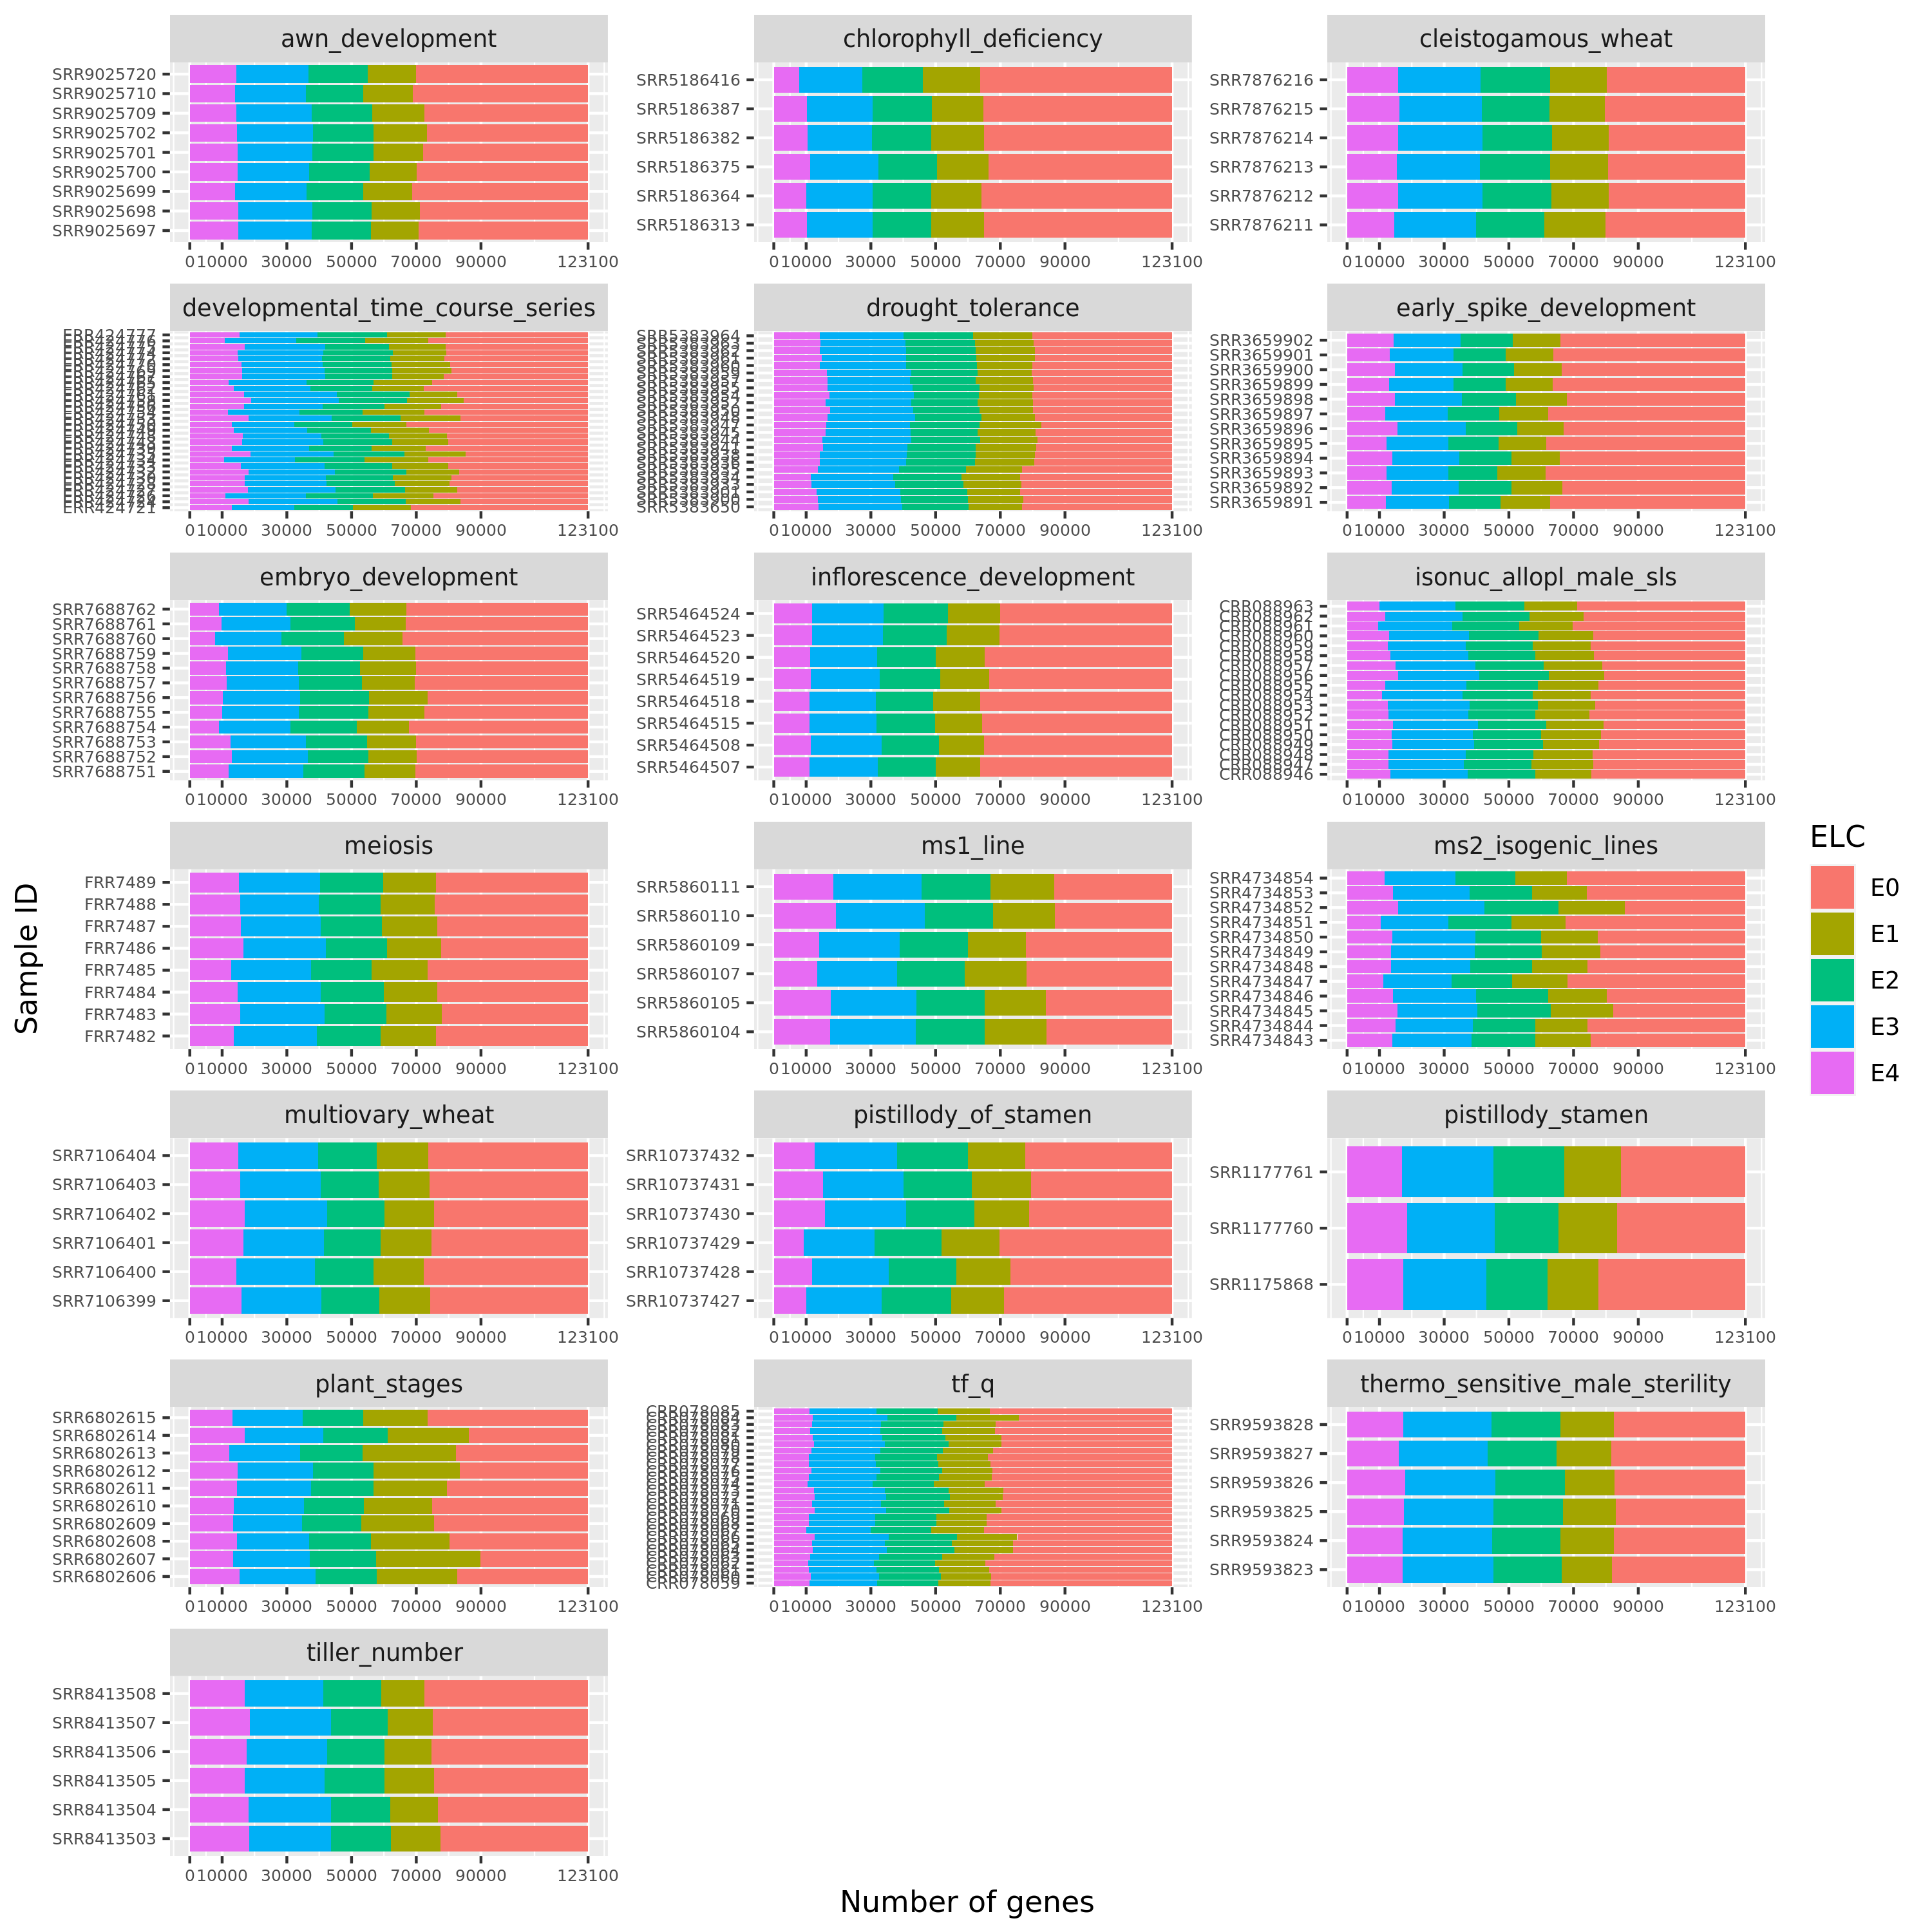

In [47]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

elc_meta %>% 
    ggplot(aes(fill = ELC, y = ELC_value, x = sample)) +
        geom_col(position = "stack") +
        coord_flip() +
        labs(x = "Sample ID", y = "Number of genes") +
        scale_y_continuous(breaks =c(0, 10000, 30000, 50000, 70000, 90000, 123100)) +
        facet_wrap( ~ dataset, scales= "free", ncol = 3) +
        theme(axis.text = element_text(size=6))

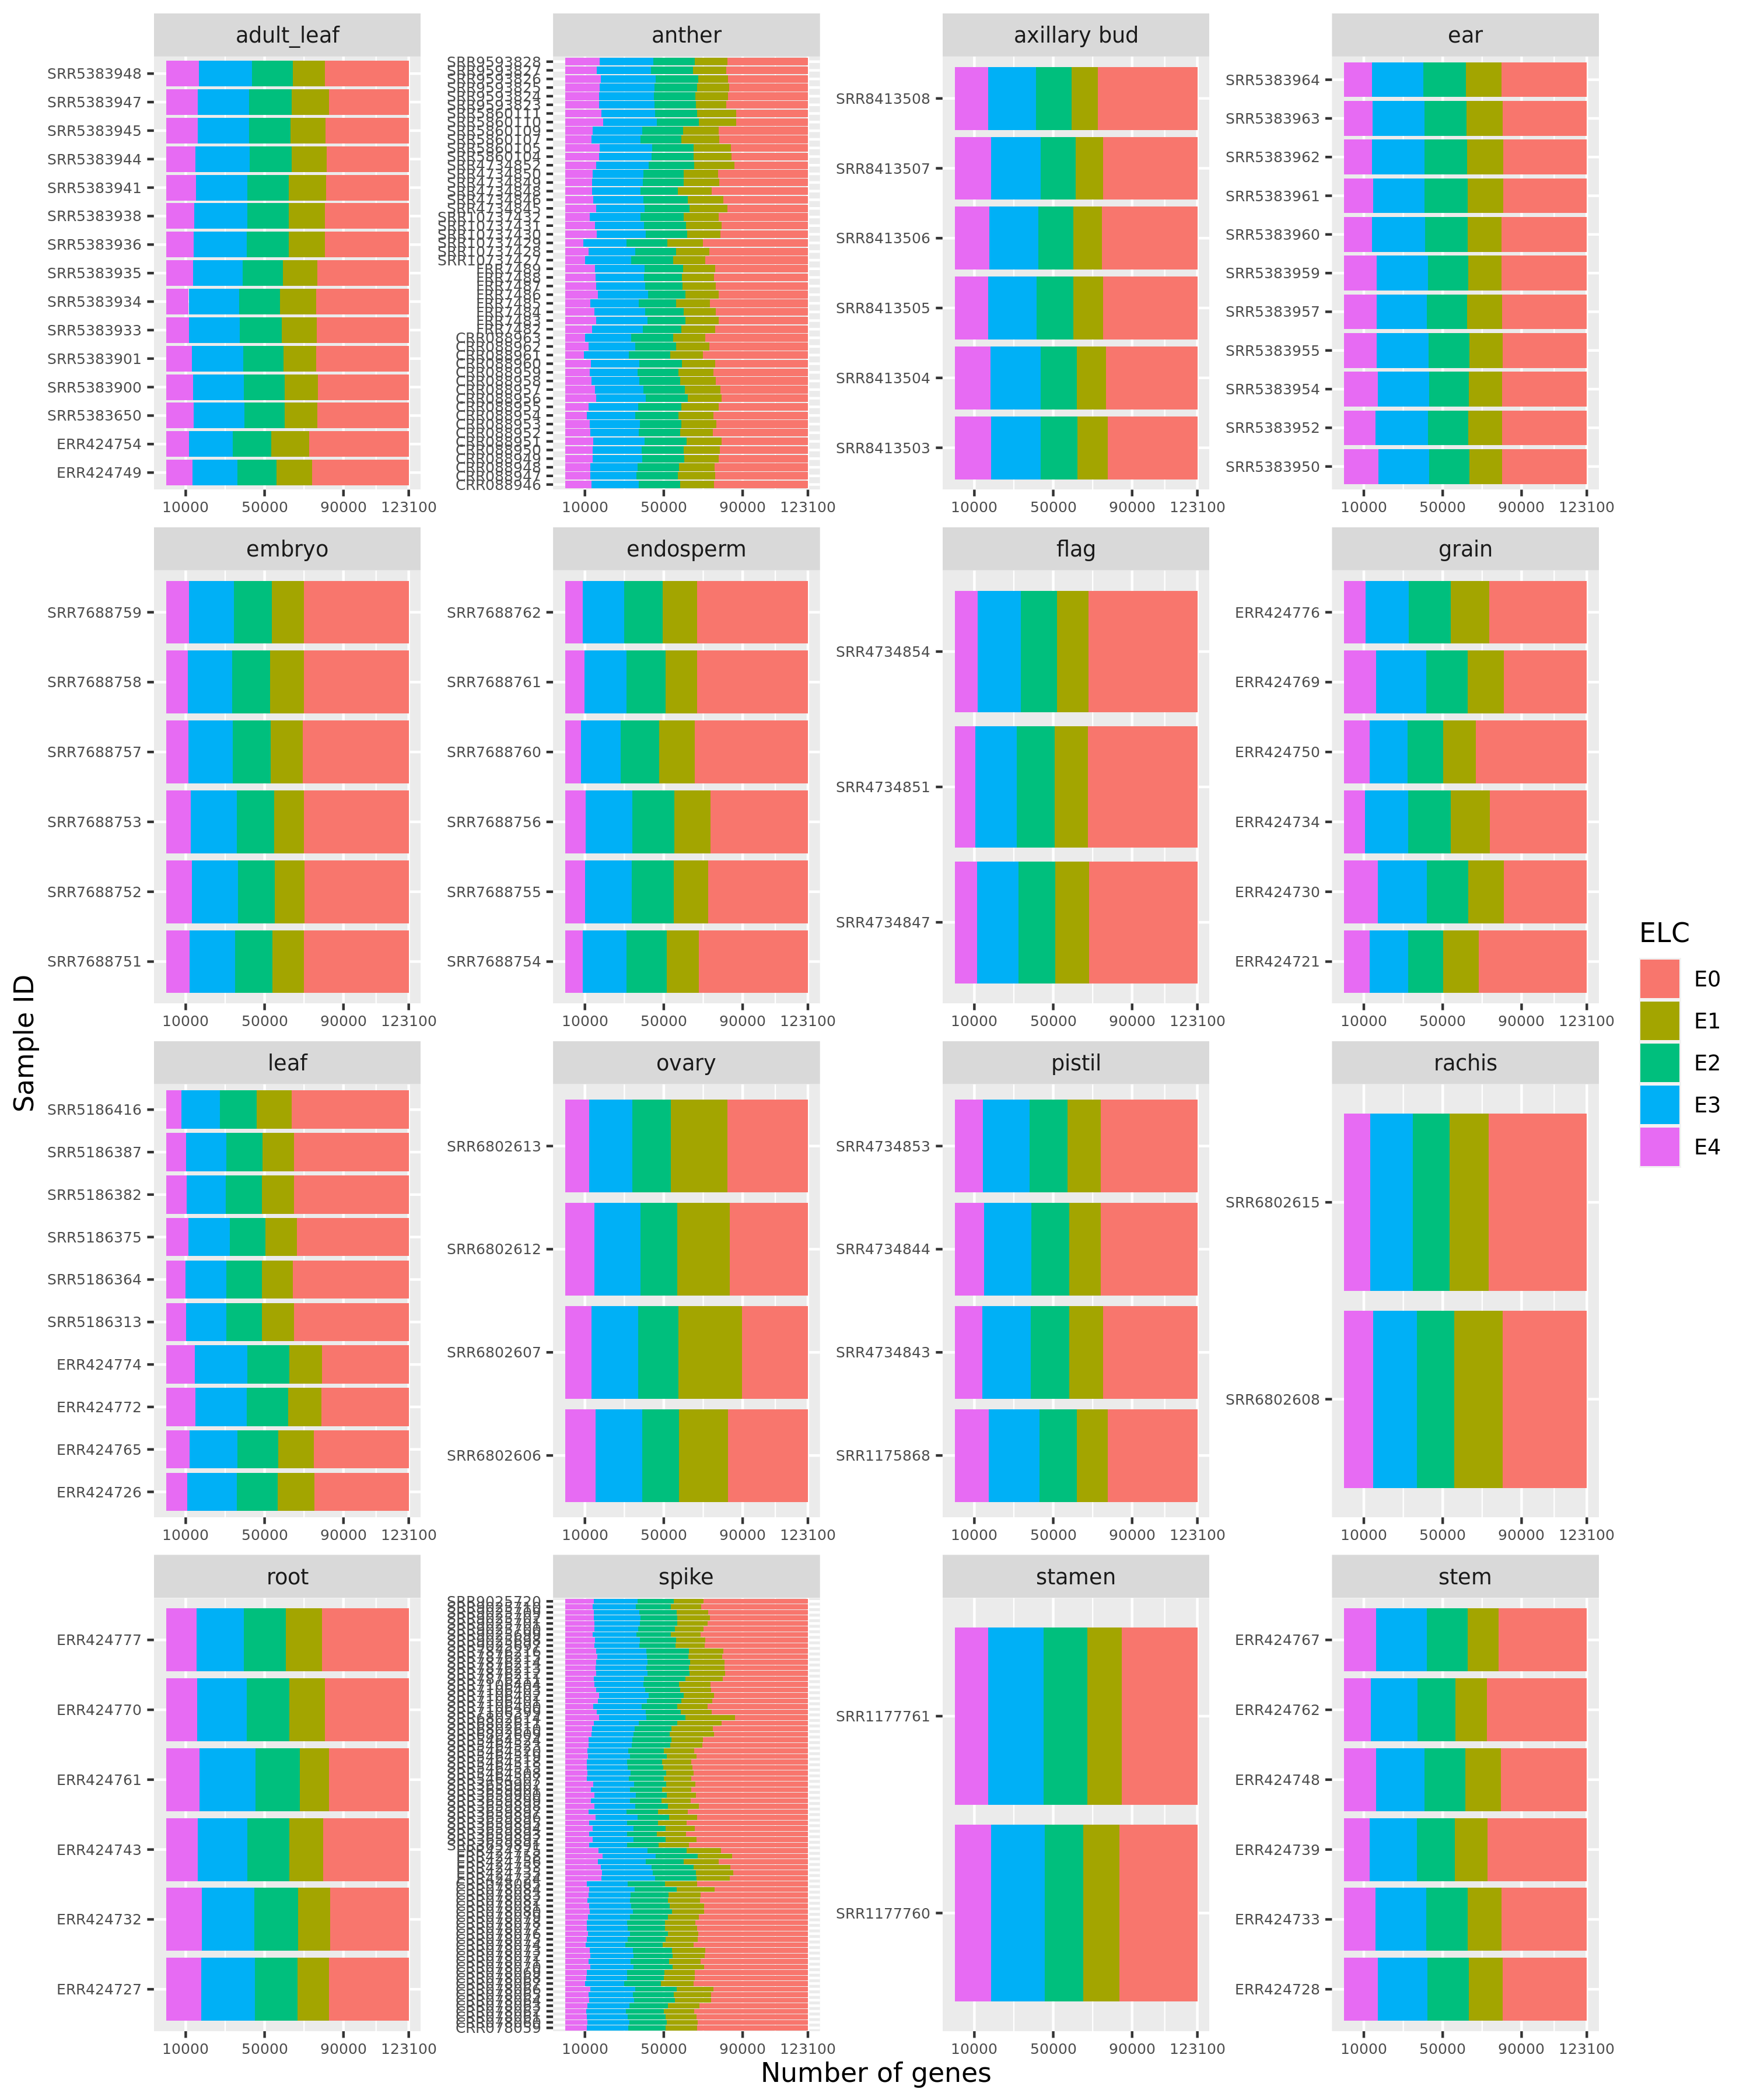

In [41]:
options(repr.plot.width = 10, repr.plot.height = 12, repr.plot.res = 300)

elc_meta %>% 
    ggplot(aes(fill = ELC, y = ELC_value, x = sample)) +
        geom_col(position = "stack") +
        coord_flip() +
        labs(x = "Sample ID", y = "Number of genes") +
        scale_y_continuous(breaks =c(10000, 50000, 90000, 123100)) +
        facet_wrap( ~ intermediate_tissue, scales= "free", ncol = 4) +
        theme(axis.text = element_text(size=6))

# Calculating expression bias
## On TPM counts

In [37]:
bias <- select(MO, locus, sample, tpm, elc)
glimpse(bias)

Rows: 26,461,125
Columns: 4
$ locus  <fct> TraesCHI1A01G000100, TraesCHI1A01G000200, TraesCHI1A01G000300,…
$ sample <fct> SRR10737427, SRR10737427, SRR10737427, SRR10737427, SRR1073742…
$ tpm    <dbl> 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 193.395199, …
$ elc    <ord> E0, E0, E0, E0, E1, E3, E3, E2, E4, E3, E2, E1, E2, E3, E4, E2…


In [39]:
bias_sum <- bias %>% filter(elc == "E4") %>%
        group_by(sample) %>%
        summarise(E4_tpm_sum = sum(tpm))
lib_size <- bias %>% group_by(sample) %>%
        summarise(lib_size = sum(tpm))
bias_lib <- inner_join(bias_sum, lib_size, by ="sample") 
bias_lib <- inner_join(bias_lib, wheat_meta_p, by = "sample")
expr_bias <- bias_lib %>% mutate(bias = E4_tpm_sum/lib_size)
glimpse(bias_sum)
glimpse(lib_size)
glimpse(expr_bias)

Warning message:
“Column `sample` joining factor and character vector, coercing into character vector”

Rows: 215
Columns: 2
$ sample     <fct> SRR10737427, SRR10737428, SRR10737429, SRR10737430, SRR107…
$ E4_tpm_sum <dbl> 9122546, 9513476, 5967099, 9857947, 8762122, 9779950, 9122…
Rows: 215
Columns: 2
$ sample   <fct> SRR10737427, SRR10737428, SRR10737429, SRR10737430, SRR10737…
$ lib_size <dbl> 12548905, 13487925, 9197070, 14286156, 13293828, 14068842, 1…
Rows: 215
Columns: 23
$ sample              <chr> "SRR10737427", "SRR10737428", "SRR10737429", "SRR…
$ E4_tpm_sum          <dbl> 9122546, 9513476, 5967099, 9857947, 8762122, 9779…
$ lib_size            <dbl> 12548905, 13487925, 9197070, 14286156, 13293828, …
$ dataset             <chr> "pistillody_of_stamen", "pistillody_of_stamen", "…
$ gm                  <chr> "wt", "wt", "wt", "mut", "mut", "mut", "wt", "wt"…
$ zadoc_scale         <int> 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 5…
$ intermediate_age    <chr> "Heading", "Heading", "Heading", "Heading", "Head…
$ high_level_age      <chr> "Reproductive", "Reproductive", "Reprod

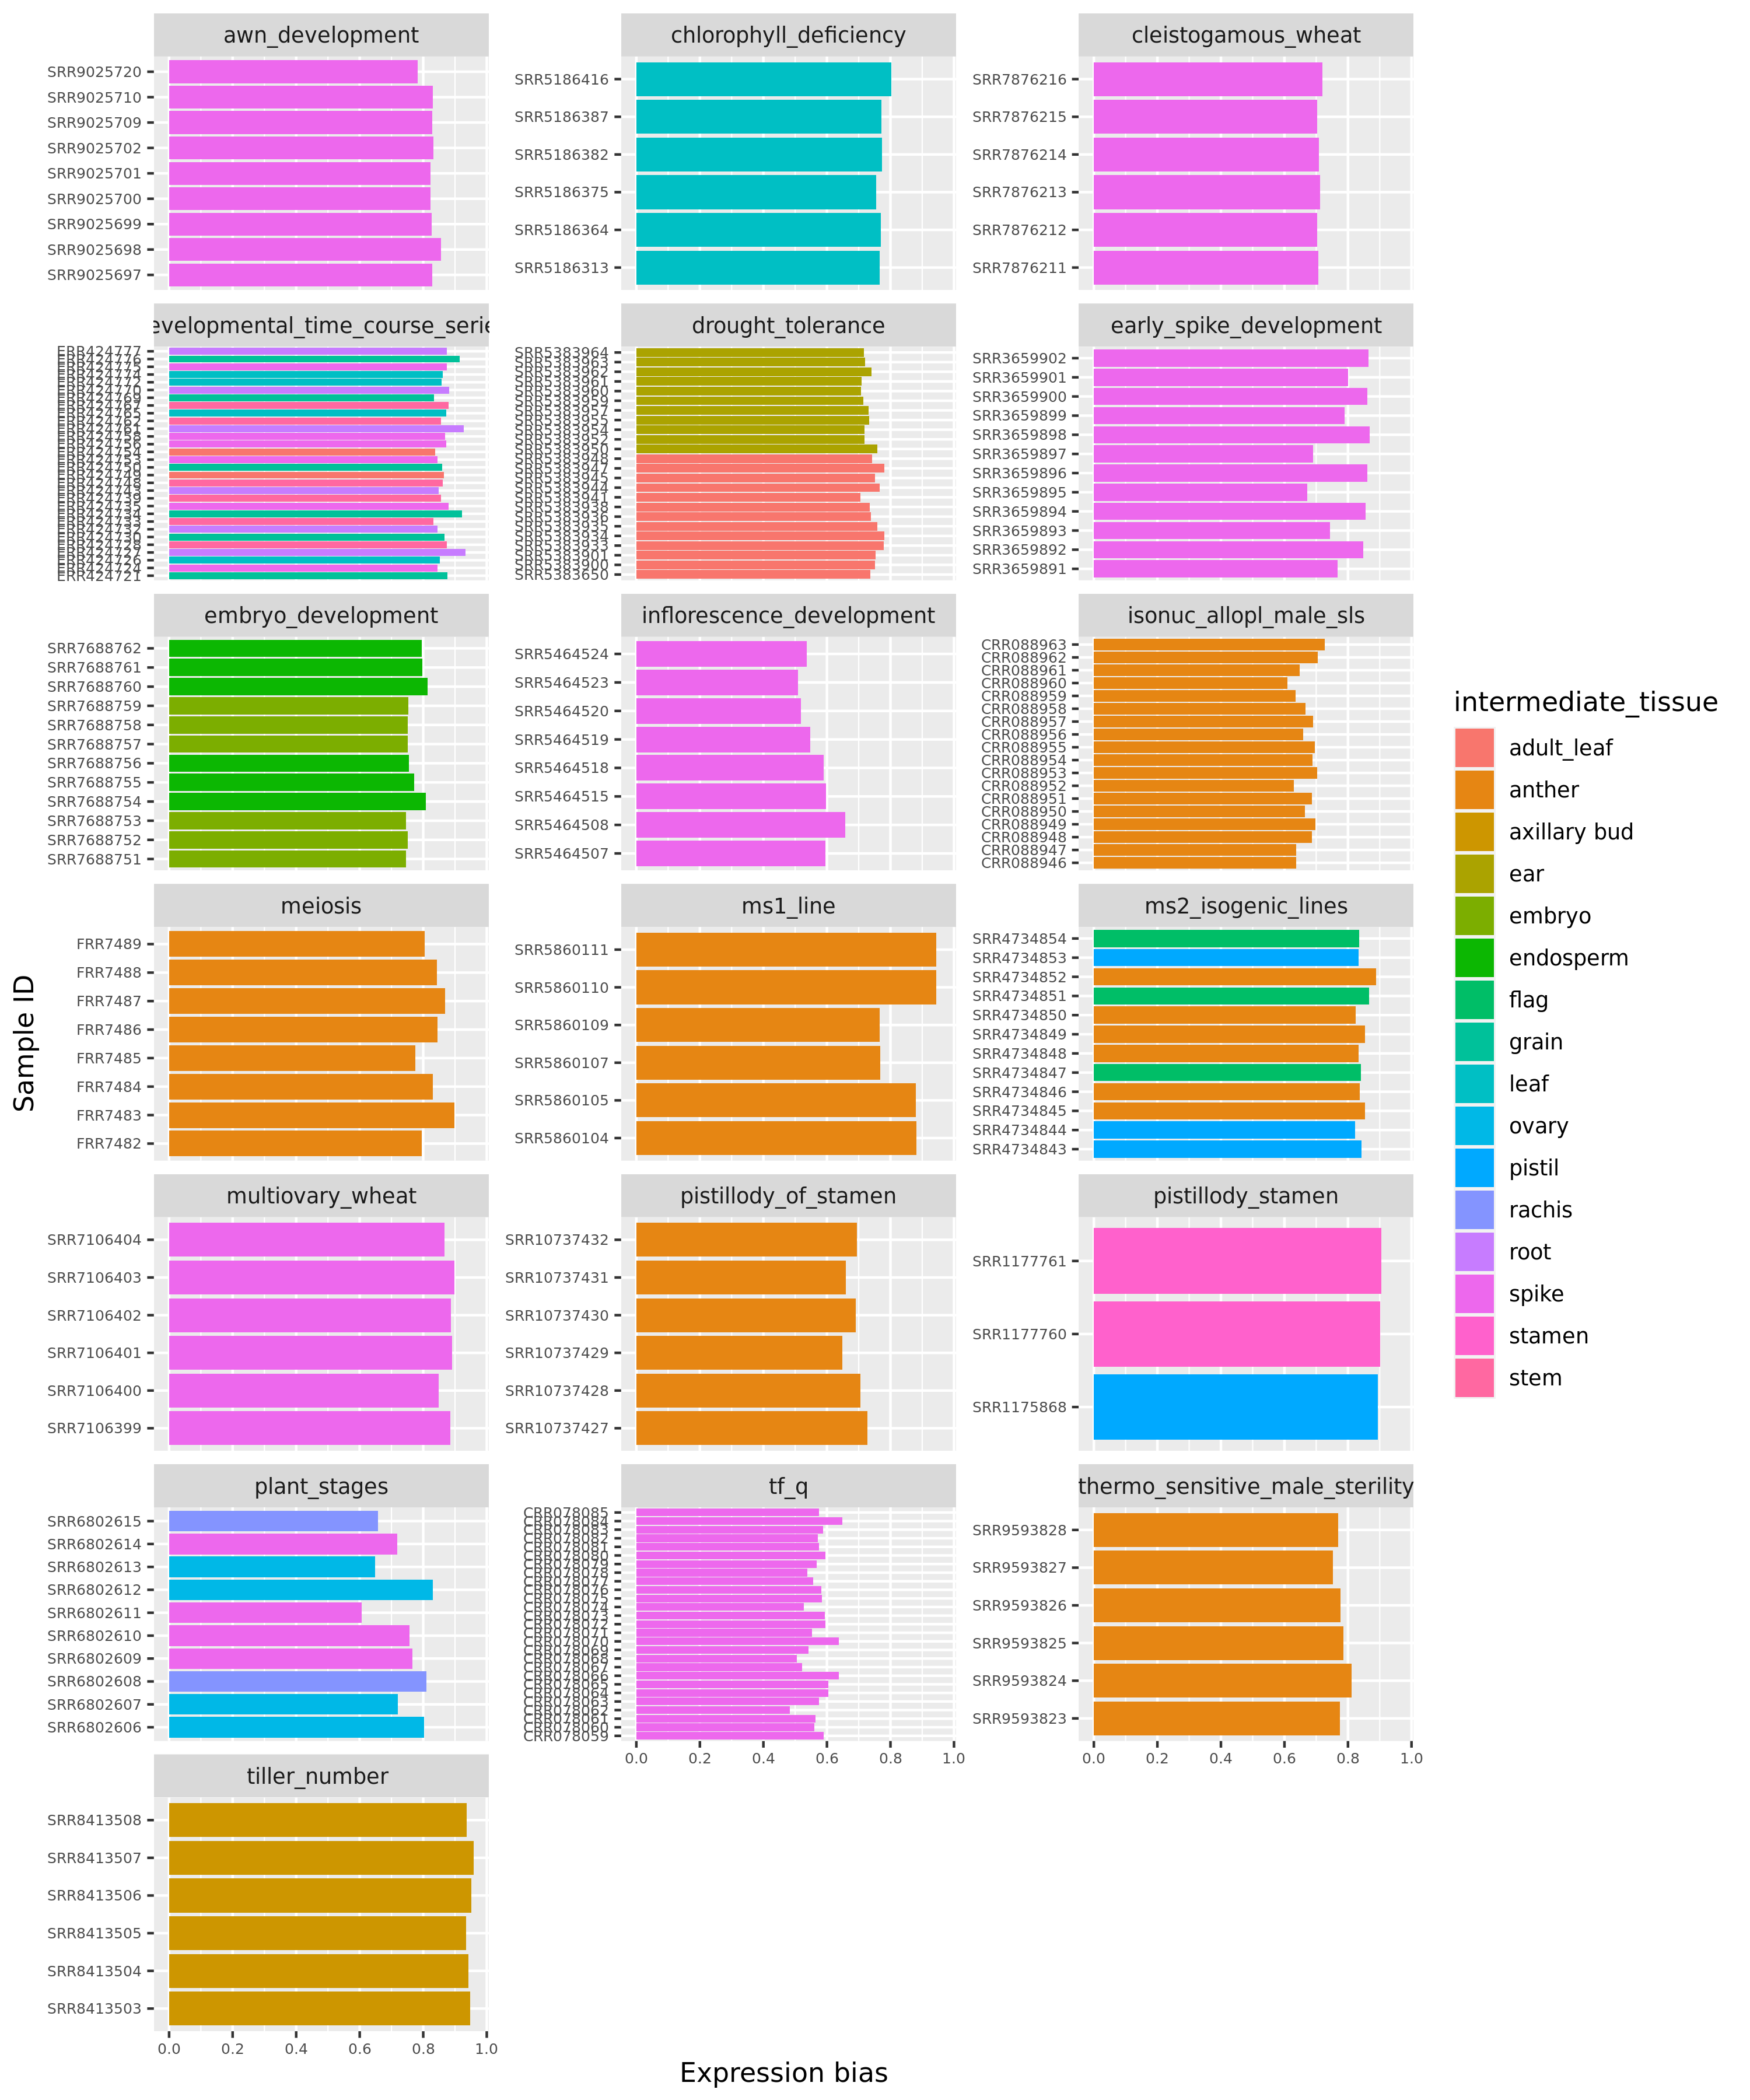

In [40]:
expr_bias %>%
    ggplot(aes(y = bias, x = sample, fill = intermediate_tissue)) +
    geom_col() +
    coord_flip() +
    labs(x = "Sample ID", y = "Expression bias") +
    scale_y_continuous(breaks =c(0, 0.2, 0.4, 0.6, 0.8, 1.0)) +
    facet_wrap( ~ dataset, scales= "free_y", ncol = 3) +
    theme(axis.text = element_text(size=6))

In [ ]:
sessionInfo()